In [101]:
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

### 128 더하거나 빼기

In [102]:
img = cv2.imread("./rabbit.jpg", cv2.IMREAD_GRAYSCALE)
img1 = img + 128
img2 = img - 128
cv2.imshow("rabbit", img)
cv2.imshow("rabbit1", img1)
cv2.imshow("rabbit2", img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [103]:
img

array([[ 75,  83,  77, ..., 154, 154, 154],
       [ 77,  80,  74, ..., 152, 152, 152],
       [ 83,  82,  77, ..., 147, 147, 147],
       ...,
       [194, 191, 201, ..., 205, 203, 199],
       [194, 191, 201, ..., 205, 203, 199],
       [194, 191, 201, ..., 205, 203, 199]], dtype=uint8)

In [104]:
img2

array([[203, 211, 205, ...,  26,  26,  26],
       [205, 208, 202, ...,  24,  24,  24],
       [211, 210, 205, ...,  19,  19,  19],
       ...,
       [ 66,  63,  73, ...,  77,  75,  71],
       [ 66,  63,  73, ...,  77,  75,  71],
       [ 66,  63,  73, ...,  77,  75,  71]], dtype=uint8)

In [105]:
img1

array([[203, 211, 205, ...,  26,  26,  26],
       [205, 208, 202, ...,  24,  24,  24],
       [211, 210, 205, ...,  19,  19,  19],
       ...,
       [ 66,  63,  73, ...,  77,  75,  71],
       [ 66,  63,  73, ...,  77,  75,  71],
       [ 66,  63,  73, ...,  77,  75,  71]], dtype=uint8)

75 + 128 = 203

75 - 128 + 256 = 203

똑같은 결과

이 문제를 해결하기위해 상한선과 하한선을 설정하였다

In [106]:
alist1 = []
for i in img:
    for k in i:
        if k+128>255:
            alist1.append(255)
        else:
            alist1.append(k+128)

In [107]:
alist2 = []
for i in img:
    for k in i:
        if k-128<0:
            alist2.append(0)
        else:
            alist2.append(k-128)

In [108]:
img1 = np.uint8(np.reshape(alist1, (467,467)))
img2 = np.uint8(np.reshape(alist2, (467,467)))

In [109]:
cv2.imshow("rabbit", img)
cv2.imshow("rabbit1", img1)
cv2.imshow("rabbit2", img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 픽셀 값을 2배, 1/2배 해보기

In [110]:
img1 = img/2
img2 = img*2
cv2.imshow("rabbit", img)
# uint8로 전환해야 나옴
cv2.imshow("rabbit1", np.uint8(img1))
cv2.imshow("rabbit2", np.uint8(img2))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [111]:
img

array([[ 75,  83,  77, ..., 154, 154, 154],
       [ 77,  80,  74, ..., 152, 152, 152],
       [ 83,  82,  77, ..., 147, 147, 147],
       ...,
       [194, 191, 201, ..., 205, 203, 199],
       [194, 191, 201, ..., 205, 203, 199],
       [194, 191, 201, ..., 205, 203, 199]], dtype=uint8)

In [112]:
img1

array([[ 37.5,  41.5,  38.5, ...,  77. ,  77. ,  77. ],
       [ 38.5,  40. ,  37. , ...,  76. ,  76. ,  76. ],
       [ 41.5,  41. ,  38.5, ...,  73.5,  73.5,  73.5],
       ...,
       [ 97. ,  95.5, 100.5, ..., 102.5, 101.5,  99.5],
       [ 97. ,  95.5, 100.5, ..., 102.5, 101.5,  99.5],
       [ 97. ,  95.5, 100.5, ..., 102.5, 101.5,  99.5]])

In [113]:
img2

array([[150, 166, 154, ...,  52,  52,  52],
       [154, 160, 148, ...,  48,  48,  48],
       [166, 164, 154, ...,  38,  38,  38],
       ...,
       [132, 126, 146, ..., 154, 150, 142],
       [132, 126, 146, ..., 154, 150, 142],
       [132, 126, 146, ..., 154, 150, 142]], dtype=uint8)

2배 했을 때 아까처럼 255를 넘어가면 알아서 연산을 해버리는 문제가 생김

In [114]:
alist2 = []
for i in img:
    for k in i:
        if k*2>255:
            alist2.append(255)
        else:
            alist2.append(k*2)
img2 = np.uint8(np.reshape(alist2, (467,467)))

In [115]:
cv2.imshow("rabbit", img)
cv2.imshow("rabbit1", np.uint8(img1))
cv2.imshow("rabbit2", np.uint8(img2))
cv2.waitKey(0)
cv2.destroyAllWindows()

### Complement

전체를 뒤집기

In [116]:
img1 = 255 - img
cv2.imshow("rabbit", img)
# uint8로 전환해야 나옴
cv2.imshow("rabbit1", np.uint8(img1))
cv2.waitKey(0)
cv2.destroyAllWindows()

어두운 픽셀만 뒤집기

In [117]:
alist2 = []
for i in img:
    for k in i:
        if k<128:
            alist2.append(255-k)
        else:
            alist2.append(k)
img2 = np.uint8(np.reshape(alist2, (467,467)))
cv2.imshow("rabbit", img)
# uint8로 전환해야 나옴
cv2.imshow("rabbit1", np.uint8(img2))
cv2.waitKey(0)
cv2.destroyAllWindows()

밝은 픽셀만 뒤집기

In [118]:
alist1 = []
for i in img:
    for k in i:
        if k>128:
            alist1.append(255-k)
        else:
            alist1.append(k)
img1 = np.uint8(np.reshape(alist1, (467,467)))
cv2.imshow("rabbit", img)
# uint8로 전환해야 나옴
cv2.imshow("rabbit1", np.uint8(img1))
cv2.waitKey(0)
cv2.destroyAllWindows()

### 히스토그램

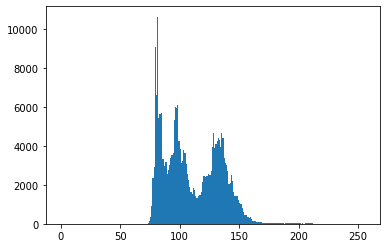

In [119]:
img = cv2.imread("./boy.jpg",0)
plt.hist(img.ravel(), 256, [0,256])
plt.show()

In [120]:
cv2.imshow("boy", np.uint8(img))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [167]:
img.shape

(552, 454)

In [121]:
alist1 = []
for i in img:
    for k in i:
        alist1.append(k//16)
img1 = np.uint8(np.reshape(alist1, (552,454)))

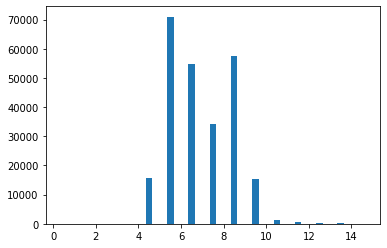

In [122]:
plt.hist(img1.ravel(), 15, [0,15], rwidth=0.3)
plt.show()

5에서 9에 몰려있으므로 고르게 분포하도록 바꿔보자(평활화)

cumsum을 사용하여 누적합을 구하고 누적합의 최대값, 최소값을 이용하여 히스토그램이 넓게 분포되도록 만들어해주는 룩업 테이블( look-up table)을 만든다

In [123]:
#equ = cv.equalizeHist(gray)로 한번에 할 수도 있다.
hist, bin = np.histogram(img.flatten(), 256, [0, 256])
cdf = hist.cumsum()
cdf_mask = np.ma.masked_equal(cdf,0)
cdf_mask = (cdf_mask - cdf_mask.min())*255/(cdf_mask.max()-cdf_mask.min())
cdf = np.ma.filled(cdf_mask,0).astype('uint8')
equ = cdf[img]

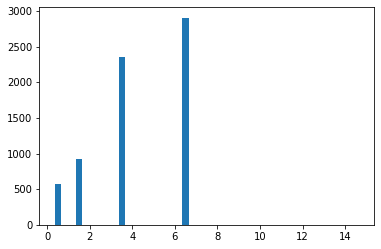

In [124]:
plt.hist(equ.ravel(), 15, [0,15], rwidth=0.3)
plt.show()

In [125]:
cv2.imshow("boy", np.uint8(img))
cv2.imshow("boy1", np.uint8(equ))
cv2.waitKey(0)
cv2.destroyAllWindows()

### Threshold

In [126]:
img = cv2.imread("./rice.jpg", cv2.IMREAD_GRAYSCALE)
img1 = img>110
# double형으로 바꿔줘야한다!
img1 = np.double(img1)

In [127]:
cv2.imshow("rice", img)
cv2.imshow("rice1", img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

double threshold

In [128]:
img = cv2.imread("./rabbit.jpg", cv2.IMREAD_GRAYSCALE)
img1 = 110<img
img1 = img<200
# double형으로 바꿔줘야한다!
img1 = np.double(img1)

In [129]:
cv2.imshow("rabbit", img)
cv2.imshow("rabbit1", img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [130]:
#88이면 100으로 할 때 보다 배경의 까만 점을 더 잘 없앨 수 있는데 글자가 덜 또렷해짐

img = cv2.imread("./word.jpg", cv2.IMREAD_GRAYSCALE)
img1 = img>88
# double형으로 바꿔줘야한다!
img1 = np.double(img1)

In [131]:
cv2.imshow("word", img)
cv2.imshow("word1", img1)
cv2.waitKey(0)
cv2.destroyAllWindows()